将句子根据空格进行切词，然后根据GLove词向量表获取词向量，最后将整个句子的词向量平均输出得到一维向量

In [1]:
import numpy as np

# 加载GloVe词嵌入
def load_glove_embeddings(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float32)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

# 将句子转换为向量
def sentence_to_avg(sentence, word_to_vec_map):
    words = sentence.lower().strip().split()
    
    avg = np.zeros(300,)
    
    for w in words:
        avg += word_to_vec_map[w]
    
    avg = avg / len(words)
    
    return avg

word_to_index, index_to_word, word_to_vec_map = load_glove_embeddings('data/glove.6B/glove.6B.300d.txt')
sentence1 = "I love dogs"
sentence1_avg = sentence_to_avg(sentence1, word_to_vec_map)
sentence2 = "I love cats"
sentence2_avg = sentence_to_avg(sentence2, word_to_vec_map)
sentence3 = "I hate dogs"
sentence3_avg = sentence_to_avg(sentence3, word_to_vec_map)
sentence4 = "my dad is a doctor and he always go hiking"
sentence4_avg = sentence_to_avg(sentence4, word_to_vec_map)


画出句子向量的热度图

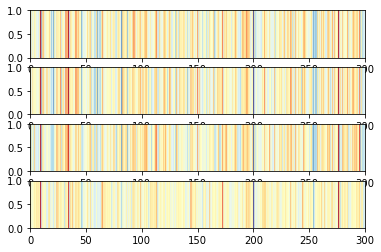

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 


# Create the plot
fig, ax = plt.subplots(4,1)
ax[0].pcolor(sentence1_avg[None, :], cmap=plt.cm.RdYlBu, alpha=0.8, vmax=1, vmin=-1)
ax[1].pcolor(sentence2_avg[None, :], cmap=plt.cm.RdYlBu, alpha=0.8, vmax=1, vmin=-1)
ax[2].pcolor(sentence3_avg[None, :], cmap=plt.cm.RdYlBu, alpha=0.8, vmax=1, vmin=-1)
ax[3].pcolor(sentence4_avg[None, :], cmap=plt.cm.RdYlBu, alpha=0.8, vmax=1, vmin=-1)
plt.show()
